In [1]:
import torch
import hdf5plugin
from tqdm import tqdm
from pathlib import Path
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

from ev_loader.DSEC_dataloader.provider import DatasetProvider
from ev_loader.visualization.visualization import disp_img_to_rgb_img

Cannot use ros api
Cannot use ros api
Cannot import Open3d
Cannot import Open3d


  0%|          | 0/26160 [07:42<?, ?it/s]


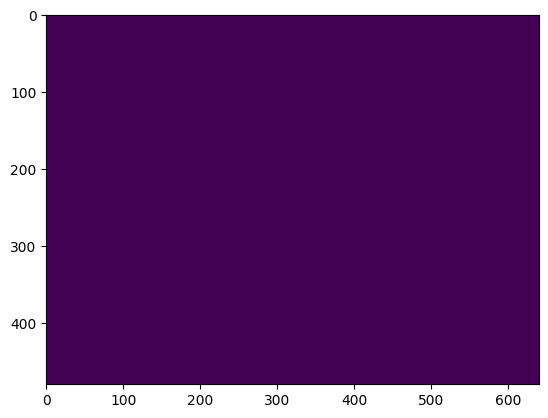

In [4]:
dsec_dir = "/data/scratch/pellerito/datasets/DSEC"
batch_size = 1
num_workers = 0
sequence_len = 1
representation='voxel_tstamp_image'

dsec_dir = Path(dsec_dir)
assert dsec_dir.is_dir()

dataset_provider = DatasetProvider(dsec_dir, representation=representation)
train_dataset = dataset_provider.get_recurrent_train_dataset(sequence_len=sequence_len)
train_loader = DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=False)

with torch.no_grad():
    for datas in tqdm(train_loader):
        for data in datas:
            if batch_size == 1:
                disp = data['disparity_gt'].numpy().squeeze()
                disp_img = disp_img_to_rgb_img(disp)
                depth_img = data["depth_gt"].numpy().squeeze()
                # plt.imshow(depth_img)
                dyn_obj_mask = data["dynamic_mask_gt"].numpy().squeeze()
                plt.imshow(dyn_obj_mask)
                plt.savefig("dyn_obj_mask.png")
            break
        break


In [3]:
data["disparity_gt"]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])